To explore whether there is a relative age effect in politics, we decided to explore the birth months of politicians to investigate for any trends.

<h4> 1.  MP's and their birth month </h4>  

<p> We first graph MPs and their birth month to understand the average densities of politicians for each month of the year. </p>

<p> As you can see from the Figure 1, a greater proportion of politicians are born in the first six months of the year.</p>



In [ ]:
import pandas as pd
from plotnine import * 

data=pd.read_csv('data/data_included.csv')
data['birth_date']=pd.to_datetime(data['birth_date'], errors='coerce')

# Create a dataframe with MPs by month
monthly_df=data.groupby(data['birth_date'].dt.month).count()[['name']]
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df['percentage']=(monthly_df['name']/monthly_df['name'].sum()*100).round(2)
monthly_df.rename(columns={'name':'count'},inplace=True)
# monthly_df

# Read data file and remove unnecessary columns & records
import pandas as pd
births_data=pd.read_csv('data/Births Data UN.csv')
births_data.drop(['Area', 'Record Type', 'Value Footnotes', 'Source Year'],axis=1,inplace=True)
births_data=births_data.query("Month in ['January','February','March','April','May','June','July','August','September','October','November','December']")

# Groupby month and sum births
births_df=births_data.groupby('Month').sum()[['Value']]
births_df=births_df.reindex(['January','February','March','April','May','June','July','August','September','October','November','December'])
births_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
births_df['births_percentage']=(births_df['Value']/births_df['Value'].sum()*100).round(2)
births_df.rename(columns={'Value':'births_count'},inplace=True)

births_df.drop(['births_count'],axis=1,inplace=True) 
# births_df 

df=pd.merge(monthly_df,births_df,how='inner',left_index=True,right_index=True)
df['percentage']=(df['count']/df['count'].sum()*100).round(2)
df['difference']=df['percentage']-df['births_percentage']
df['pc_difference']=df['difference']/df['births_percentage']*100
df['pc_difference']=df['pc_difference'].round(2)
df.index=pd.CategoricalIndex(df.index, categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], ordered=True)
# df
# from UN_monthly_births import births_df
# try:
#     births_df.drop(['births_count'],axis=1,inplace=True)
# except:
#     births_df
# births_df

df_for_double_plot=pd.concat([df[['percentage']], df[['births_percentage']].rename(columns={'births_percentage':'percentage'})], axis=0).reset_index()
df_for_double_plot['category']=['MPs' if x<12 else 'Births' for x in range(24)]
# df_for_double_plot

# Double bar plot in plotnine
ggplot(df_for_double_plot, aes(x='index', y='percentage', fill='category')) \
    + geom_hline(yintercept=8.33, linetype='dashed', color='black') \
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Month', y='Percentage', title='MPs vs Births by Month') \
    + theme(figure_size=(10, 5)) 

# this is where i need to put the code for the MPs vs Birth Month picture 

<p> This trend was noticed from Figure 2, which compares politicians birth month to population data to population birth month data collected from the UN databases. </p>


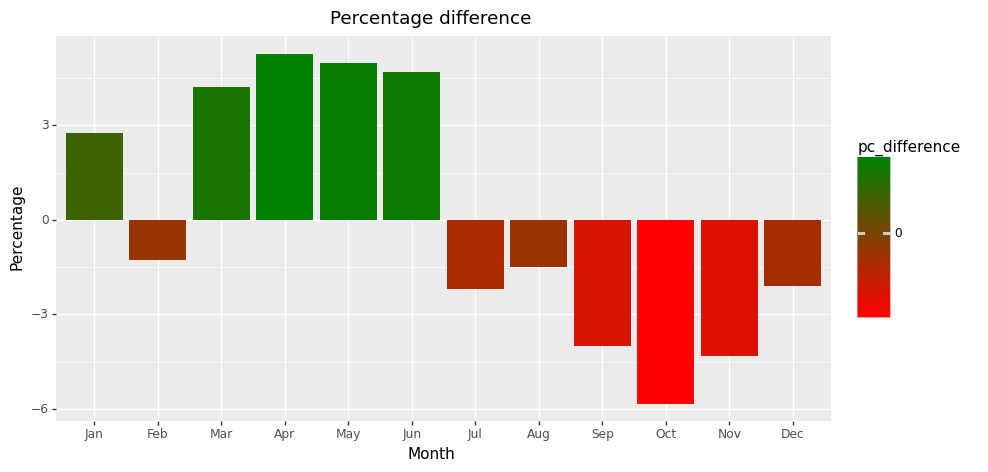

<ggplot: (329120665)>

In [21]:
#  Percentage difference plot
ggplot(df,aes(x='df.index',y='pc_difference', fill='pc_difference')) \
    + geom_bar(stat='identity') \
    + labs(title='Percentage difference',x='Month',y='Percentage') \
    + scale_fill_gradient(low='red',high='green', breaks=[0]) \
    + theme(figure_size=(10,5))

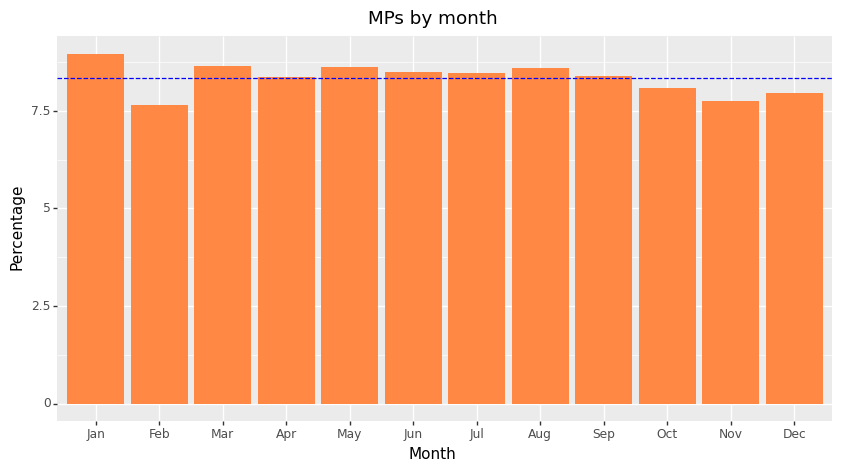

<ggplot: (332065221)>

In [22]:
ggplot(df,aes(x='df.index',y='percentage')) \
    + geom_bar(stat='identity', fill='#FF8844') \
    + labs(title='MPs by month',x='Month',y='Percentage') \
    + geom_hline(yintercept=8.33,linetype='dashed',color='blue') \
    + theme(figure_size=(10,5))

<p> As an observation, we notice a 3.43% difference across politician birth month data for the first six months of the year. Compared to the last six months of the year, we notice a -3.32% difference. </p>

<p>The relative age effect could be explanatory here. Politicians born in the first six months may have an advantage in education, leadership, and experience. This is because, for a school system that starts in September, those born in the first six months of the year will be in the school year above those born in the last six months of the year. However, these are just observed trends, hence we cannot make any conclusions. </p>


<h4> 2. Comparing to developing countries </h4>


<p> Since we observed trends in birth month and politician density, we decided to investigate whether this differed between developing and developed countries.</p>

<p> To do this we used the Human Development Index (HDI), scraping data from the UN databases. We define a developing country as one with a low HDI, specifically an index of less than 0.7. </p>


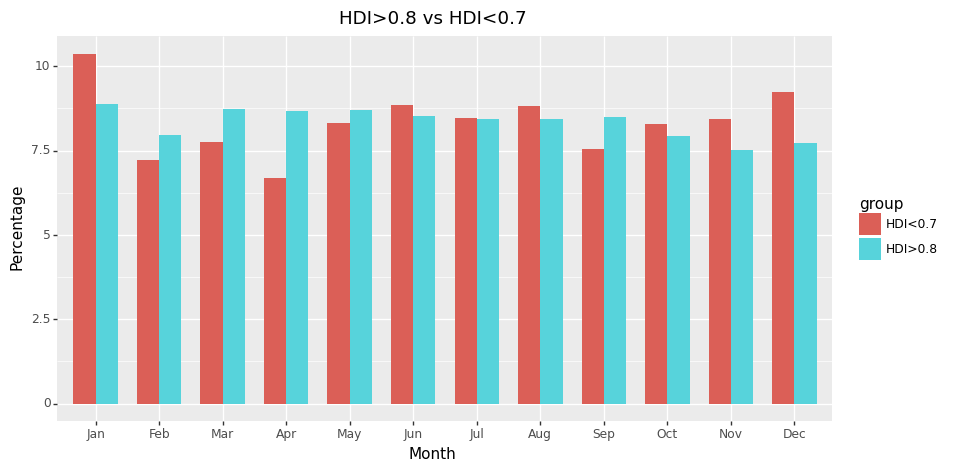

<ggplot: (332130301)>

In [24]:
import utils 


# '''This module contains utility functions, variables, and data structures for use in the notebooks.'''

import pandas as pd

#------------------------------------Top and bottom countries of indices------------------------------------

# UN Indices Data:
indices_data=pd.read_csv('data/UN HDR all indices data.csv')
indices_data=indices_data[['country','hdi_2021','le_2021','eys_2021','mys_2021','gnipc_2021', 'gdi_2021','ihdi_2021','coef_ineq_2021','region', 'gii_2021']]

high_hdi=indices_data[indices_data['hdi_2021']>0.8]['country'].tolist()
low_hdi=indices_data[indices_data['hdi_2021']<0.7]['country'].tolist()

top_50_mys=indices_data.sort_values(by=['mys_2021'], ascending=False).head(50)['country'].tolist()
bottom_50_mys=indices_data.sort_values(by=['mys_2021'], ascending=True).head(50)['country'].tolist()

top_gii=indices_data.sort_values(by=['gii_2021'], ascending=False).head(20)['country'].tolist()
bottom_gii=indices_data.sort_values(by=['gii_2021'], ascending=True).head(20)['country'].tolist()

#------------------------------------Income groups------------------------------------

# World Bank Data:
wb_data=pd.read_csv('data/income_data.csv')

low_income=wb_data[wb_data['Income group']=='Low income']['Country'].tolist()
high_income=wb_data[wb_data['Income group']=='High income']['Country'].tolist()

#------------------------------------V-Dem Electoral Democracy Score------------------------------------
vdem_data=pd.read_csv('data/v_dem_elec_democracy.csv')
vdem_data=vdem_data.query('Year==2022')

low_dem=vdem_data[vdem_data['electdem_vdem_owid']<0.4]['Entity'].tolist()
high_dem=vdem_data[vdem_data['electdem_vdem_owid']>0.8]['Entity'].tolist()

#------------------------------------Hemispheres------------------------------------

#north_hem=['Algeria', 'Benin', 'Burkina Faso', 'Burundi', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Djibouti', 'Egypt', 'Equatorial Guinea', 'Eritrea', 'Ethiopia', 'Gabon', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Ivory Coast', 'Kenya', 'Liberia', 'Libya', 'Mali', 'Mauritania', 'Niger', 'Nigeria', 'Rwanda', 'Senegal', 'Sierra Leone', 'Somalia', 'South Sudan', 'Sudan', 'Tanzania', 'Togo', 'Tunisia', 'Uganda', 'Zambia', 'Zimbabwe', 'Afghanistan', 'Armenia', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Bhutan', 'Brunei', 'Cambodia', 'China', 'Cyprus', 'Georgia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Israel', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Lebanon', 'Malaysia', 'Maldives', 'Mongolia', 'Myanmar', 'Nepal', 'North Korea', 'Oman', 'Pakistan', 'Palestine', 'Philippines', 'Qatar', 'Russia', 'Saudi Arabia', 'Singapore', 'South Korea', 'Sri Lanka', 'Syria', 'Taiwan', 'Tajikistan', 'Thailand', 'Turkey', 'Turkmenistan', 'United Arab Emirates', 'Uzbekistan', 'Vietnam', 'Albania', 'Andorra', 'Austria', 'Belarus', 'Belgium', 'Bosnia and Herzegovina', 'Bulgaria', 'Croatia', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'Ireland', 'Italy', 'Latvia', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Macedonia', 'Malta', 'Moldova', 'Monaco', 'Montenegro', 'Netherlands', 'North Macedonia', 'Norway', 'Poland', 'Portugal', 'Romania', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Vatican City', 'Antigua and Barbuda', 'Bahamas', 'Barbados', 'Belize', 'Canada', 'Costa Rica', 'Cuba', 'Dominica', 'Dominican Republic', 'El Salvador', 'Grenada', 'Guatemala', 'Haiti', 'Honduras', 'Jamaica', 'Mexico', 'Nicaragua', 'Panama', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Trinidad and Tobago', 'United States of America', 'Oceania', 'Fiji', 'Kiribati', 'Marshall Islands', 'Micronesia', 'Nauru', 'New Zealand', 'Palau', 'Papua New Guinea', 'Samoa', 'Solomon Islands', 'Tonga', 'Tuvalu', 'Vanuatu']

countries=pd.read_csv('data/countries.csv',encoding='latin-1')
north_hem=countries[countries['latitude']>0]['name'].tolist()
south_hem=countries[countries['latitude']<0]['name'].tolist()

#------------------------------------Gender quotas------------------------------------

quotas_df=pd.read_csv('data/gender_quotas.csv')
legal_quotas=quotas_df[quotas_df['Voluntary political party quotas']=='No']['Country'].tolist()

top_hdi=data.query('country in @high_hdi')
top_hdi_monthly=top_hdi.groupby(data['birth_date'].dt.month).count()[['name']]
bottom_hdi=data.query('country in @low_hdi')
bottom_hdi_monthly=bottom_hdi.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(top_hdi_monthly,bottom_hdi_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'top_hdi','name_y':'bottom_hdi'},inplace=True)
monthly_df['top_hdi_percentage']=(monthly_df['top_hdi']/monthly_df['top_hdi'].sum()*100).round(2)
monthly_df['bottom_hdi_percentage']=(monthly_df['bottom_hdi']/monthly_df['bottom_hdi'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df.index=pd.Categorical(monthly_df.index,categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)
# monthly_df  



# Create a double bar plot for hdi analysis
hdi_plot_df=pd.concat([monthly_df[['top_hdi_percentage']].rename(columns={'top_hdi_percentage':'percentage'})\
                   ,monthly_df[['bottom_hdi_percentage']].rename(columns={'bottom_hdi_percentage':'percentage'})],axis=0).reset_index()
hdi_plot_df['group']=['HDI>0.8' if i<12 else 'HDI<0.7' for i in range(24)]
ggplot(hdi_plot_df,aes(x='index',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Month', y='Percentage', title='HDI>0.8 vs HDI<0.7') \
    + theme(figure_size=(10, 5))

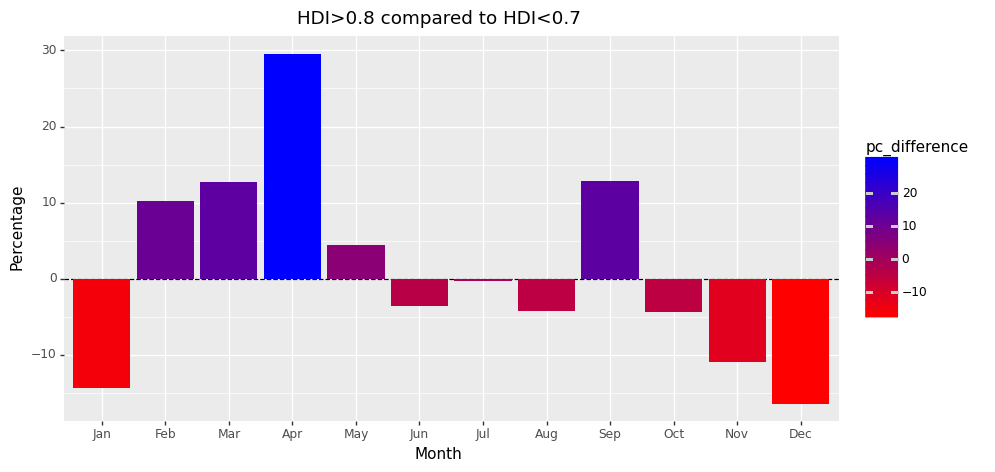

<ggplot: (332132693)>

In [25]:
monthly_df['difference']=monthly_df['top_hdi_percentage']-monthly_df['bottom_hdi_percentage']
monthly_df['pc_difference']=monthly_df['difference']/monthly_df['bottom_hdi_percentage']*100
monthly_df['pc_difference']=monthly_df['pc_difference'].round(2)
monthly_df
ggplot(monthly_df,aes(x=monthly_df.index,y='pc_difference', fill='pc_difference'))\
    + geom_hline(yintercept=0, linetype='dashed', color='black') \
    + geom_bar(stat='identity') \
    + labs(x='Month', y='Percentage', title='HDI>0.8 compared to HDI<0.7') \
    + theme(figure_size=(10, 5))\
    + scale_fill_gradient(low='red',high='blue')

<p> From this we observe no overall trends. </p>

<p> • There is a greater density of politicians born in January for countries with a low HDI </p> 

<p> • However, all 39 African countries have a low HDI, except Mauritius, thus make up most of our dataset </p>

<p> • Most African countries start school in January, hence this could offer some explanation why we see these trends - but again, no definite conclusion </p>


</h4> 3. Mean Years of Schooling </h4>

These results are prevalent from Figure 4. This figure represents the mean years of schooling for each month of the year:

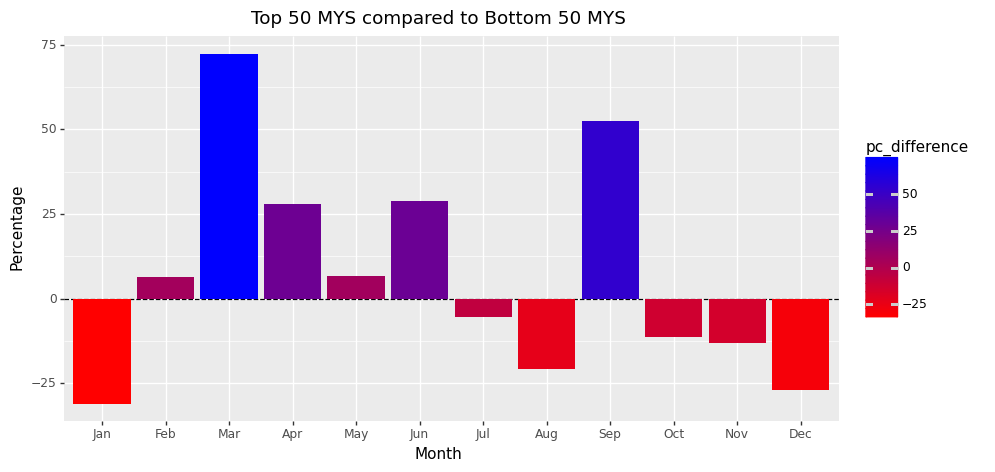

<ggplot: (332058725)>

In [26]:
# Analysis for mean years of schooling. Top 50 vs bottom 50 countries.
top_mys=data.query('country in @top_50_mys')
top_mys_monthly=top_mys.groupby(data['birth_date'].dt.month).count()[['name']]
bottom_mys=data.query('country in @bottom_50_mys')
bottom_mys_monthly=bottom_mys.groupby(data['birth_date'].dt.month).count()[['name']]

monthly_df=pd.merge(top_mys_monthly,bottom_mys_monthly,how='inner',left_index=True,right_index=True)
monthly_df.rename(columns={'name_x':'top_mys','name_y':'bottom_mys'},inplace=True)
monthly_df['top_mys_percentage']=(monthly_df['top_mys']/monthly_df['top_mys'].sum()*100).round(2)
monthly_df['bottom_mys_percentage']=(monthly_df['bottom_mys']/monthly_df['bottom_mys'].sum()*100).round(2)
monthly_df.index=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthly_df.index=pd.Categorical(monthly_df.index,categories=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'],ordered=True)
# monthly_df

# Create a double bar plot for MYS analysis
mys_plot_df=pd.concat([monthly_df[['top_mys_percentage']].rename(columns={'top_mys_percentage':'percentage'})\
                   ,monthly_df[['bottom_mys_percentage']].rename(columns={'bottom_mys_percentage':'percentage'})],axis=0).reset_index()
mys_plot_df['group']=['Top 50' if i<12 else 'Bottom 50' for i in range(24)]
ggplot(mys_plot_df,aes(x='index',y='percentage',fill='group'))\
    + geom_bar(stat='identity', position='dodge', width=0.7) \
    + labs(x='Month', y='Percentage', title='Top 50 MYS vs Bottom 50 MYS') \
    + theme(figure_size=(10, 5)) 

monthly_df['difference']=monthly_df['top_mys_percentage']-monthly_df['bottom_mys_percentage']
monthly_df['pc_difference']=monthly_df['difference']/monthly_df['bottom_mys_percentage']*100
monthly_df['pc_difference']=monthly_df['pc_difference'].round(2)
monthly_df
ggplot(monthly_df,aes(x=monthly_df.index,y='pc_difference', fill='pc_difference'))\
    + geom_hline(yintercept=0, linetype='dashed', color='black') \
    + geom_bar(stat='identity') \
    + labs(x='Month', y='Percentage', title='Top 50 MYS compared to Bottom 50 MYS') \
    + theme(figure_size=(10, 5))\
    + scale_fill_gradient(low='red',high='blue')

Those born in January for the top 50 countries are 25% lower than the bottom 50 countries. 

However, we had some concerns about the quality of the data, specifically completeness of data entry for a number of low development countries


Since we are avoiding making any strong conclusions or justifications for the observed patterns, we turn our focus on the UK in our later analysis, in the hope to observe related trends.